In [112]:
import numpy as np
import pandas as pd


In [113]:
df = pd.read_csv('spam.csv')

In [114]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4982,ham,Networking job is there.,NaN,NaN,NaN
28,ham,"I'm back &amp; we're packing the car now, I'll...",NaN,NaN,NaN
4775,ham,Quite lor. But dun tell him wait he get compla...,NaN,NaN,NaN
3165,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,NaN,NaN,NaN
4886,spam,Todays Vodafone numbers ending with 4882 are s...,NaN,NaN,NaN


In [115]:
df.shape

(5572, 5)

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy


# First Step :- Data Cleaning


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [117]:
#drop last 3 columns of null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [118]:
df.sample(5)

,v1,v2
5031,ham,Ok i vl..do u know i got adsense approved..
3404,ham,"Jus chillaxin, what up"
4165,ham,Well if I'm that desperate I'll just call arma...
322,ham,cud u tell ppl im gona b a bit l8 cos 2 buses ...
2911,ham,You didn't have to tell me that...now i'm thin...


In [119]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5210,ham,Dai i downloaded but there is only exe file wh...
2832,spam,You've won tkts to the EURO2004 CUP FINAL or 8...
2765,ham,and picking them up from various points
2864,ham,He says hi and to get your ass back to south t...
3819,ham,"I got arrested for possession at, I shit you n..."


In [120]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [121]:
df['target']=encoder.fit_transform(df['target'])

In [122]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [124]:
# check for duplicated values
df.duplicated().sum()

404

In [125]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [126]:
df.duplicated().sum()

0

In [127]:
df.shape

(5168, 2)

# Second Step :- Exploratory Data Analysis

In [128]:
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

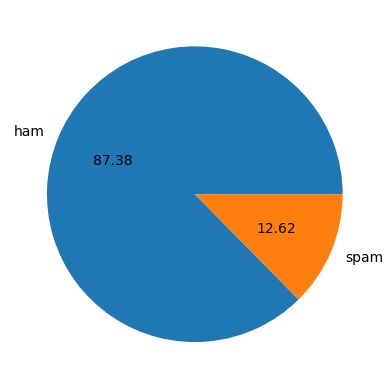

In [129]:
import matplotlib.pyplot as plot
plot.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plot.show()

# We can see data is imbalanced

In [130]:
import nltk


In [131]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [132]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [133]:
df['num_characters']=df['text'].apply(len)

In [134]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [135]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [136]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [137]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [138]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [139]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759868,18.441176,1.966331
std,58.104597,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [140]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344553,17.108946,1.819973
std,56.329457,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [141]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [142]:
import seaborn as sbn

<Axes: xlabel='num_characters', ylabel='Count'>

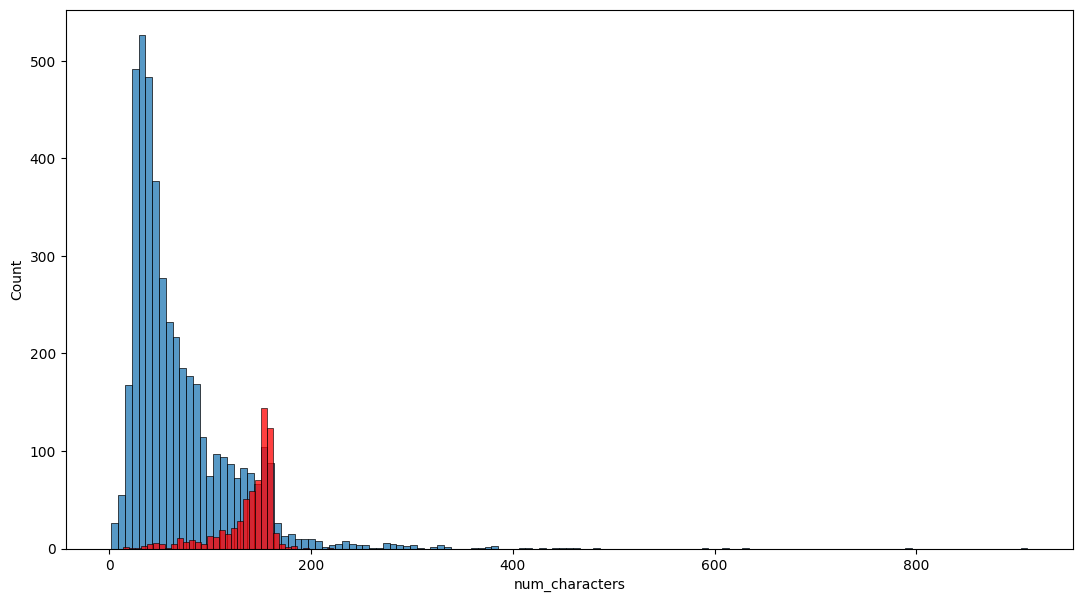

In [143]:
plot.figure(figsize=(13,7))
sbn.histplot(df[df['target'] == 0]['num_characters'])
sbn.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

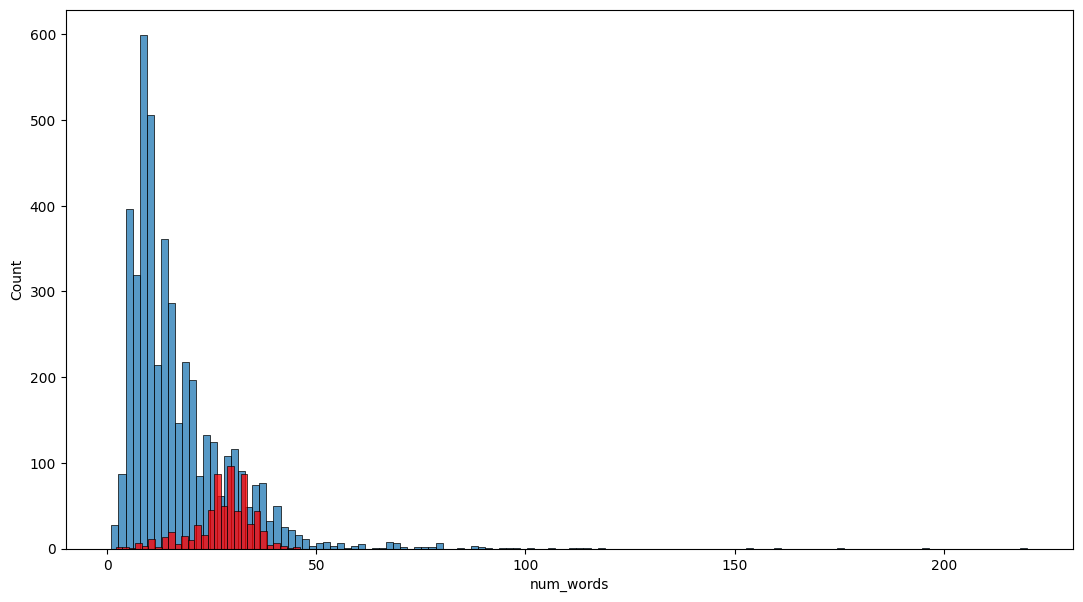

In [144]:
plot.figure(figsize=(13,7))
sbn.histplot(df[df['target'] == 0]['num_words'])
sbn.histplot(df[df['target'] == 1]['num_words'],color='red')

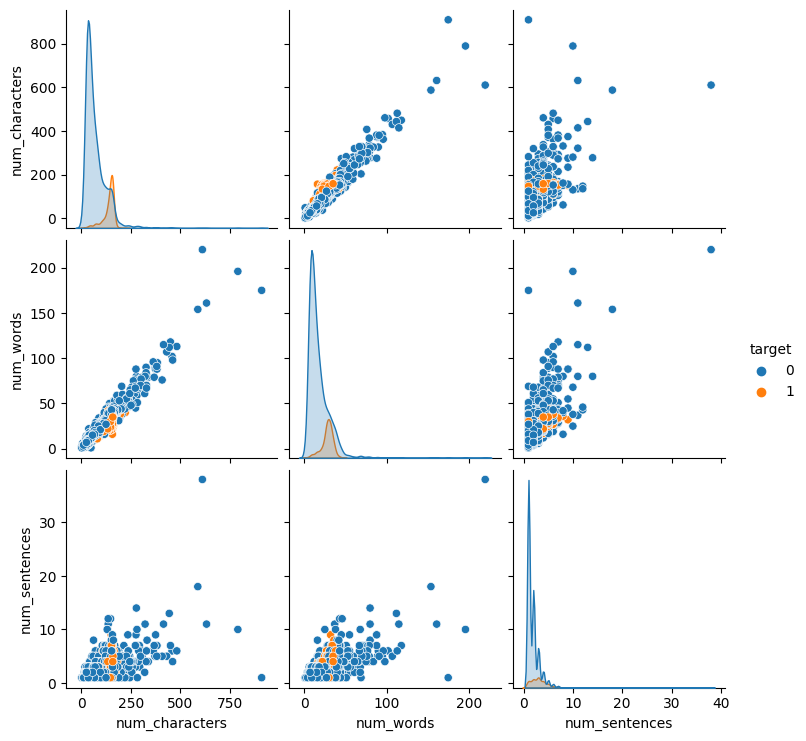

In [145]:
sbn.pairplot(df,hue='target')

In [146]:
sbn.heatmap(df.corr())

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Data Preprocessing

In [ ]:

from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [147]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [152]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [153]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

NameError: name 'wc' is not defined